# Tools

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Dataset

In [3]:
bc = load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Creating Dataframe

In [9]:
df = pd.DataFrame(bc.data, columns=bc.feature_names)
df['target'] = bc.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Review

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
df.target #Label

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [17]:
df.shape

(569, 31)

In [20]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


# Pre-processing

In [22]:
x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f'Feature => train: {x_train.shape} - test: {x_test.shape}')
print(f'Label => train: {y_train.shape} - test: {y_test.shape}')

Feature => train: (455, 30) - test: (114, 30)
Label => train: (455,) - test: (114,)


In [24]:
scalar = MinMaxScaler(feature_range=(0, 1))

x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [26]:
x_train

array([[0.06552721, 0.25769361, 0.07732252, ..., 0.60137457, 0.52493594,
        0.52950153],
       [0.65620256, 0.57017247, 0.67420686, ..., 0.9975945 , 0.49931007,
        0.62190573],
       [0.07257946, 0.14034494, 0.08023901, ..., 0.174811  , 0.33845851,
        0.25313666],
       ...,
       [0.32317939, 0.2404464 , 0.30146536, ..., 0.11453608, 0.17602996,
        0.05222109],
       [0.30799745, 0.33513696, 0.30729834, ..., 0.62783505, 0.31815494,
        0.42777213],
       [0.21984426, 0.36557322, 0.20842225, ..., 0.25536082, 0.22255076,
        0.11648016]])

# Calculate metrics

In [41]:
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred_test)

    print(f'acc train: {acc_train:.4f} - acc test: {acc_test:.4f} - precision: {p:.4f} - recall: {r:.4f} - f1-score: {f1:.4f}')

    return acc_train, acc_test, p, r, f1

# Classification

## Naive Bayes

In [42]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [43]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb, f1_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9363 - acc test: 0.9649 - precision: 0.9589 - recall: 0.9859 - f1-score: 0.9722


##KNN

In [44]:
knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [45]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn, f1_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9736 - acc test: 0.9649 - precision: 0.9718 - recall: 0.9718 - f1-score: 0.9718


## Decision Tree

In [46]:
dt = DecisionTreeClassifier(max_depth=64, min_samples_split=2, criterion='gini')
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=64)

In [47]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt, f1_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0000 - acc test: 0.9298 - precision: 0.9437 - recall: 0.9437 - f1-score: 0.9437


## Random Forest

In [48]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=32, min_samples_split=4)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=32, min_samples_split=4, n_estimators=1000)

In [49]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf, f1_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0000 - acc test: 0.9649 - precision: 0.9589 - recall: 0.9859 - f1-score: 0.9722


## SVM

In [50]:
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)

SVC(kernel='poly')

In [51]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm, f1_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9890 - acc test: 0.9825 - precision: 0.9726 - recall: 1.0000 - f1-score: 0.9861


## Logistic Regression

In [52]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [53]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr, f1_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9692 - acc test: 0.9825 - precision: 0.9726 - recall: 1.0000 - f1-score: 0.9861


## ANN

In [54]:
ann = MLPClassifier(hidden_layer_sizes=216, activation='relu', solver='adam', batch_size=64)
ann.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=64, hidden_layer_sizes=216)

In [55]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann, f1_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9890 - acc test: 0.9737 - precision: 0.9722 - recall: 0.9859 - f1-score: 0.9790


# Comparison

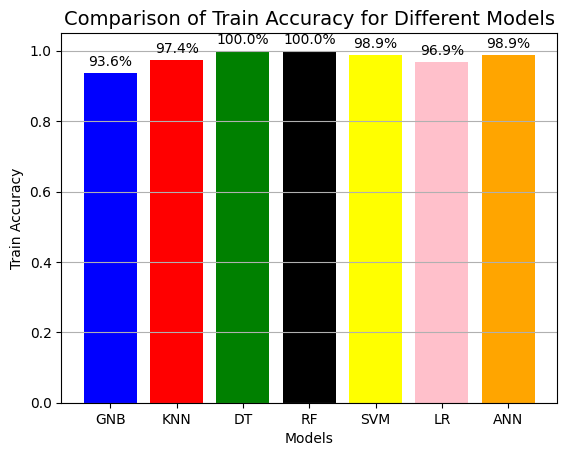

In [82]:
acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["blue", "red", "green", "black", "yellow", "pink", "orange"]

plt.bar(title, acc_train, color=colors)
plt.title("Comparison of Train Accuracy for Different Models", fontsize=14)
plt.ylabel("Train Accuracy")
plt.xlabel("Models")
plt.grid(axis='y')

for i, value in enumerate(acc_train):
    plt.text(i, value + 0.02, f"{value*100:.1f}%", ha='center', fontsize=10)
plt.show()

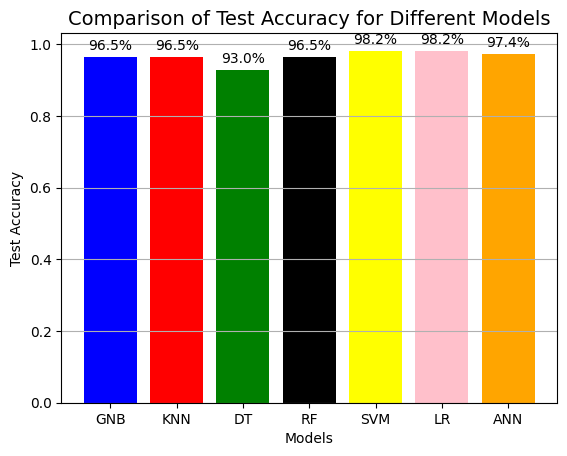

In [81]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["blue", "red", "green", "black", "yellow", "pink", "orange"]

plt.bar(title, acc_test, color=colors)
plt.title("Comparison of Test Accuracy for Different Models", fontsize=14)
plt.ylabel("Test Accuracy")
plt.xlabel("Models")
plt.grid(axis='y')

for i, value in enumerate(acc_test):
    plt.text(i, value + 0.02, f"{value*100:.1f}%", ha='center', fontsize=10)
plt.show()

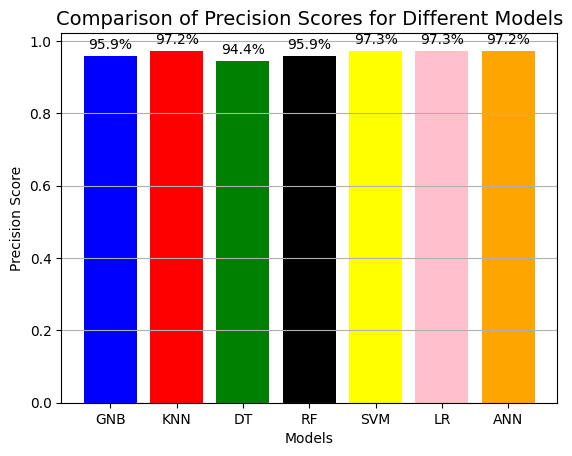

In [80]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr,p_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["blue", "red", "green", "black", "yellow", "pink", "orange"]

plt.bar(title, p, color=colors)
plt.title("Comparison of Precision Scores for Different Models", fontsize=14)
plt.ylabel("Precision Score")
plt.xlabel("Models")
plt.grid(axis='y')

for i, value in enumerate(p):
    plt.text(i, value + 0.02, f"{value*100:.1f}%", ha='center', fontsize=10)
plt.show()

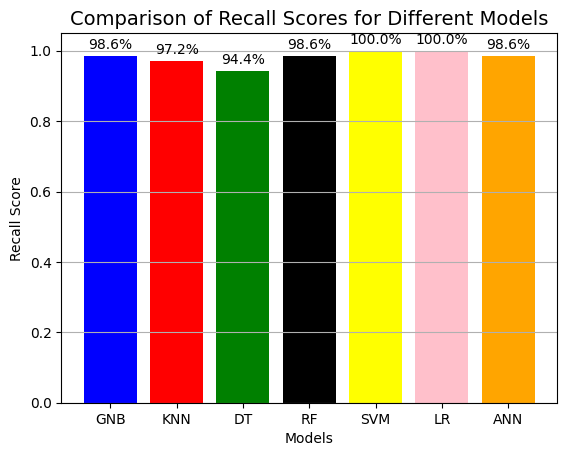

In [79]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr,r_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["blue", "red", "green", "black", "yellow", "pink", "orange"]

plt.bar(title, r, color=colors)
plt.title("Comparison of Recall Scores for Different Models", fontsize=14)
plt.ylabel("Recall Score")
plt.xlabel("Models")
plt.grid(axis='y')

for i, value in enumerate(r):
    plt.text(i, value + 0.02, f"{value*100:.1f}%", ha='center', fontsize=10)
plt.show()

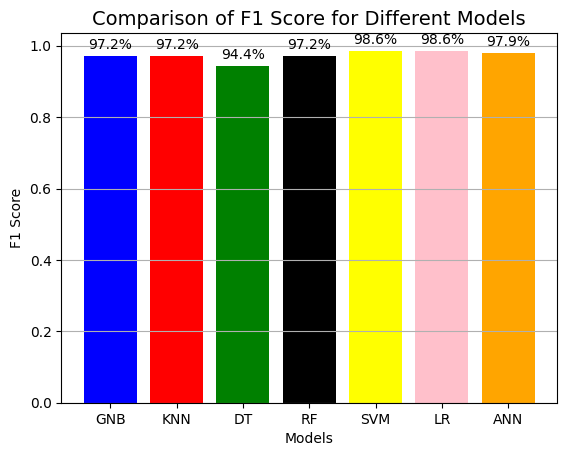

In [78]:
f1 = [f1_gnb, f1_knn, f1_dt, f1_rf, f1_svm, f1_lr, f1_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ["blue", "red", "green", "black", "yellow", "pink", "orange"]

plt.bar(title, f1, color=colors)
plt.title("Comparison of F1 Score for Different Models", fontsize=14)
plt.ylabel("F1 Score")
plt.xlabel("Models")
plt.grid(axis='y')

for i, value in enumerate(f1):
    plt.text(i, value + 0.02, f"{value*100:.1f}%", ha='center', fontsize=10)
plt.show()

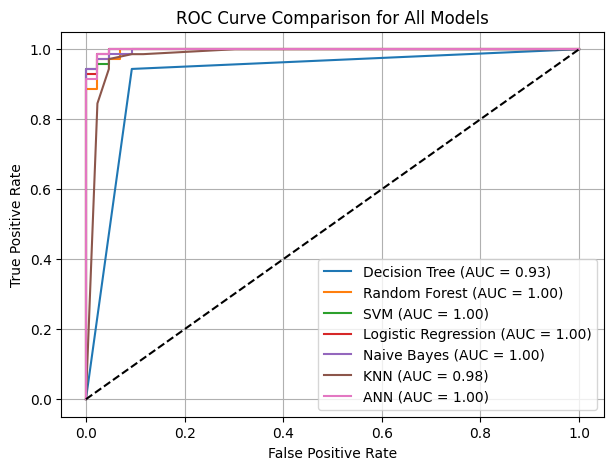

In [87]:
plt.figure(figsize=(7,5))

# Decision Tree
y_proba_dt = dt.predict_proba(x_test)[:,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")

# Random Forest
y_proba_rf = rf.predict_proba(x_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")

# SVM (با probability=True)
svm_prob = SVC(kernel='poly', probability=True)
svm_prob.fit(x_train, y_train)
y_proba_svm = svm_prob.predict_proba(x_test)[:,1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})")

# Logistic Regression
y_proba_lr = lr.predict_proba(x_test)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")

# Gaussian Naive Bayes
y_proba_gnb = gnb.predict_proba(x_test)[:,1]
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_proba_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
plt.plot(fpr_gnb, tpr_gnb, label=f"Naive Bayes (AUC = {roc_auc_gnb:.2f})")

# KNN
y_proba_knn = knn.predict_proba(x_test)[:,1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.2f})")

# ANN (MLPClassifier)
y_proba_ann = ann.predict_proba(x_test)[:,1]
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_proba_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)
plt.plot(fpr_ann, tpr_ann, label=f"ANN (AUC = {roc_auc_ann:.2f})")

# Plot style
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison for All Models")
plt.legend(loc="lower right")
plt.grid()
plt.show()
